# Light in a Field
A light particle travels through a material (represented as a scalar field) and changes its direction accordingly. This field represents a possibly nonconstant optical density. The model is built by approximating the classical Snell's law locally and discretizing the environment. This sometimes results to chaotic and complex behaviour.

by Petro Zarytskyi and Atell Krasnopolskyi, 2022.

In our model, the particle is described as follows, with only coordinates and the direction angle being its properties:
$$p := (\vec{x}, ϕ)$$
Let us define a certain small shift as
$$\vec{s} := Δs\begin{bmatrix}
\cosϕ_i\\
\sinϕ_i
\end{bmatrix}$$
where $Δs$ is a small positive constant that represents precision. \\
Angle update formula (angle in which the particle moves in radians):
$$Δϕ_i = \vec{s}\times\frac{∇n}{n};$$
$$ϕ_{i+1} = ϕ_i+Δϕ_i;$$
Coordinates update formula:
$$\vec{x}_{i+1} = \vec{x}_i + \vec{s}$$


#Derivation of the formula above
Let's consider the field on small scales so that we could approximate the scalar field $n(x, y)$ by a linear function. We'll assume that by moving a small distance, the change of direction of the light won't significantly affect the trajectory.

In order to apply the classical Snell's law, we'll think that our ray travels between two separate medias with different optical densities. The line separating those medias will go perpendicularly to $∇𝑛$. 

Let our ray's shift be the vector $\vec{s}$ with the length $|\vec{s}|=\Delta s$, $\alpha$ be the angle of incidence, and $Δϕ$ be the angle by which the ray rotates after travelling $\vec{s}$. Approximating $n(x, y)$ by a linear function, we'll get the change of $n$ between the initial and the final points equals to $\vec{s} \cdot ∇𝑛$. 

$$n \cdot \sin(\alpha) = (n+\vec{s} \cdot ∇𝑛) \sin(\alpha + Δϕ)\\\\$$

$$\sin(\alpha + Δϕ)≈\sin(\alpha)+Δϕ \cos(\alpha)\\\\$$

$$(n+\vec{s} \cdot ∇𝑛) \sin(\alpha + Δϕ)≈(n+\vec{s} \cdot ∇𝑛)(\sin(\alpha)+Δϕ \cos(\alpha))≈\\\\≈n \cdot \sin(\alpha) + (\vec{s} \cdot ∇𝑛)\sin(\alpha)+Δϕ\cdot n \cos(\alpha)\\\\$$

$$n \cdot \sin(\alpha)=n \cdot \sin(\alpha) + (\vec{s} \cdot ∇𝑛)\sin(\alpha)+Δϕ\cdot n \cos(\alpha)\\\\$$

$$Δϕ=-\frac{(\vec{s} \cdot ∇𝑛)\sin(\alpha)}{n \cos(\alpha)} = -\frac{(\vec{s} \cdot ∇𝑛)(\Delta s \cdot |∇𝑛|\sin(\alpha))}{n (\Delta s \cdot |∇𝑛|\cos(\alpha))}$$

$\alpha$ is the angle from $∇𝑛$ to $\vec{s}$, therefore:

$$\begin{cases}∇𝑛 \times \vec{s} =\Delta s \cdot |∇𝑛|\sin(\alpha)\\
\vec{s} \cdot ∇𝑛=\Delta s \cdot |∇𝑛|\cos(\alpha)\end{cases} $$

$$Δϕ=-\frac{(\vec{s} \cdot ∇𝑛)∇𝑛 \times \vec{s}}{n (\vec{s} \cdot ∇𝑛)}=-\frac{∇𝑛 \times \vec{s}}{n}$$

$$Δϕ=\vec{s} \times \frac{∇𝑛}{n}$$

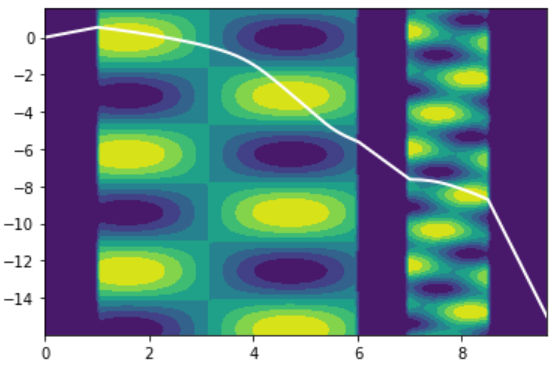

Here, light travels through vacuum and two different environments

# Chaos
Due to reasons that are currently mostly unknown to us, there appears to be chaotic behaviour of the ray's trajectory on higher iterations. Our main assumption is that the error which occurs when approximating a continuous law simply accumulates when iterating the process, thus resulting into unpredictable images.
For instance, there is a certain somehow stable equilibrium which acts as a black hole for the following input model:

$$\begin{cases}p_0 = ([0, 0]^\top, 0.5)\\
Δs = 1\cdot10^{-2} \\
n(x,y)=\begin{cases}1 \quad \text{if} \quad x<1 \\ 2+\cos(y)\sin(x)\quad \text{otherwise} \end{cases} \end{cases} $$

To observe the chaotic behaviour, I suggest setting `iters = 300000` (see below). You will see that the ray first travels in a sinewave-like way under a certain angle (yet, in fact, it is not periodic), then some chaos happens, and then it returns to the previous state and fluctuates going down for some time. However, after some chaos again, at $x\approx290$, you can see a little circle. That circle is a stable equilibrium, where the ray circles for eternity, despite the fact that the environment is smooth and periodic.

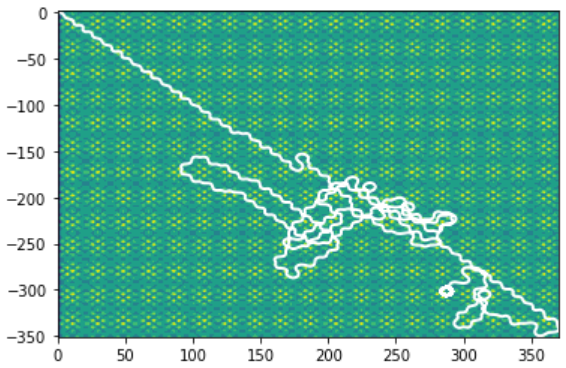

In [44]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import math
import random

cos = math.cos
sin = math.sin

In [81]:
# set up the scalar field (represents n, 1 in vaccuumm, n = c/v)
# only change the first function of x and y to change your environment
# by default, there is a vaccuum at x < 1.

def n(x: float, y: float) -> float:
  """n(x, y) -> float
     describes the scalar field. should always return a float number greater than 1."""
  if x < 1:
    return 1
  return 2+cos(x-2*y)*sin(y+2*x)

def n_vec(vec):
  """n_vec is an alias for n(x, y) that works with 2-element collections"""
  return n(vec[0], vec[1])

In [46]:
def move(p: dict, s: float):
  """moves particle p by distance s where p is a dictionary of the following form:
     {'coords' : np.array([X, Y]),
      'angle'  : radians}"""
  shft = s*np.array([cos(p['angle']), sin(p['angle'])])
  n0 = n_vec(p['coords'])
  grad = np.array([(n_vec(p['coords']+np.array([s, 0])) - n0)/s, 
          (n_vec(p['coords']+np.array([0, s])) - n0)/s])

  p['coords'] += shft
  p['angle'] += np.cross(shft, grad/n0)

In [82]:
# set up the particle
p = {'coords':np.array([0., 0]), 'angle':0.5}
# set the precision
Δ = 1e-4
# cached points (for plotting)
xs = []
ys = []

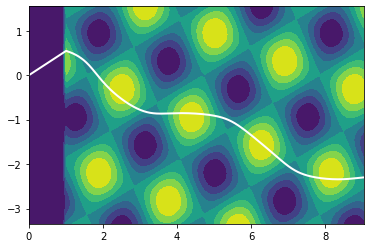

In [83]:
# iterating
iters = 100000

for i in range(iters):
  xs.append(p['coords'][0])
  ys.append(p['coords'][1])
  move(p, Δ)

# visuals
x, y = np.linspace(np.min(xs), np.max(xs),num=100), np.linspace(np.min(ys)-1, 1+np.max(ys),num=100)
F = np.zeros((x.size, y.size))
for i in range(x.size):
  for j in range(y.size):
    F[j,i] = n(x[i], y[j])

fig, ax = plt.subplots()
ax.contourf(x, y, F)
ax.plot(xs, ys, linewidth=2.0, color='white')
plt.show()